<a href="https://colab.research.google.com/github/GzpTez0514/-/blob/main/Pytorch%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A005_%E5%A4%9A%E5%B1%82%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

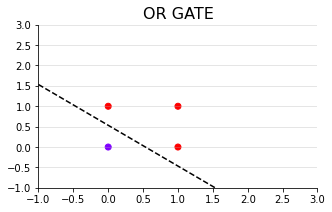

In [ ]:
# 或门
import torch
import numpy as np
import matplotlib.pyplot as plt

X = torch.tensor([[1,0,0],[1,1,0],[1,0,1],[1,1,1]], dtype = torch.float32)
orgate = torch.tensor([0,1,1,1], dtype = torch.float32)
def OR(X):
  w = torch.tensor([-0.08,0.15,0.15], dtype = torch.float32) 
  zhat = torch.mv(X,w)
  yhat = torch.tensor([int(x) for x in zhat >= 0],dtype=torch.float32)
  return yhat

OR(X)
#绘制直线划分散点的图像
x = np.arange(-1,3,0.5)
plt.figure(figsize=(5,3))
plt.title("OR GATE",fontsize=16)
plt.scatter(X[:,1],X[:,2],c=orgate,cmap="rainbow") 
plt.plot(x,(0.08-0.15*x)/0.15,color="k",linestyle="--") 
plt.xlim(-1,3) 
plt.ylim(-1,3)
plt.grid(alpha=.4,axis="y") 
plt.gca().spines["top"].set_alpha(.0) 
plt.gca().spines["right"].set_alpha(.0)

In [ ]:
# 与门
X = torch.tensor([[1,0,0],[1,1,0],[1,0,1],[1,1,1]], dtype = torch.float32)
andgate = torch.tensor([0,0,0,1], dtype = torch.float32)
def AND(X):
  w = torch.tensor([-0.2,0.15, 0.15], dtype = torch.float32)
  zhat = torch.mv(X,w)
  andhat = torch.tensor([int(x) for x in zhat >= 0],dtype=torch.float32)
  return andhat
  
andhat = AND(X)
andgate

tensor([0., 0., 0., 1.])

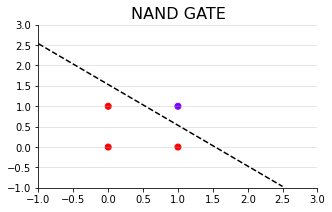

In [ ]:
# 非与门
nandgate = torch.tensor([1,1,1,0], dtype = torch.float32)
def NAND(X):
  w = torch.tensor([0.23,-0.15,-0.15], dtype = torch.float32) 
  zhat = torch.mv(X,w)
  yhat = torch.tensor([int(x) for x in zhat >= 0],dtype=torch.float32)
  return yhat

NAND(X)

x = np.arange(-1,3,0.5)
plt.figure(figsize=(5,3))
plt.title("NAND GATE",fontsize=16)
plt.scatter(X[:,1],X[:,2],c=nandgate,cmap="rainbow") 
plt.plot(x,(0.23-0.15*x)/0.15,color="k",linestyle="--") 
plt.xlim(-1,3) 
plt.ylim(-1,3)
plt.grid(alpha=.4,axis="y") 
plt.gca().spines["top"].set_alpha(.0) 
plt.gca().spines["right"].set_alpha(.0)

In [ ]:
# 异或门
def XOR(X):
  # 输入值：
  input_1 = X
  # 中间层:
  sigma_nand = NAND(input_1)
  sigma_or = OR(input_1)
  x0 = torch.tensor([1, 1, 1, 1], dtype=torch.float32)
  # 输出层：
  input_2 = torch.cat((x0, sigma_nand.view(4, 1), sigma_or.view(4, 1)), dim=1)
  y_and = AND(input_2)
  return y_and